# Coding Ninjas Zomato ApI Code 

Delhi_ncr 7947 rest_india 705


([0, 1], <a list of 2 Text major ticklabel objects>)

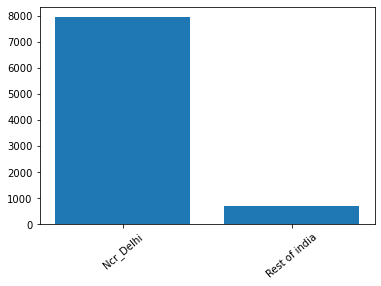

In [91]:
# Ques1 part 1
import requests as rq
import json
import pandas as pd 
import os
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv' ) 
delhi = data[data.City == 'New Delhi']
Ghaziabad = data[data.City == 'Ghaziabad']
Noida = data[data.City == 'Noida']
Gurgaon = data[data.City == 'Gurgaon']
Faridabad = data[data.City == 'Faridabad']


Delhi_ncr = len(delhi)+ len(Ghaziabad) + len(Noida) + len(Gurgaon) + len(Faridabad)
x = Delhi_ncr
india = data[data['Country Code'] == 1]
rest_india = len(india) - Delhi_ncr
y = rest_india
print('Delhi_ncr' ,Delhi_ncr , 'rest_india' , rest_india)
plt.bar(('Ncr_Delhi','Rest of india') , (x ,y) )
plt.xticks(rotation=40)


In [77]:
# Ques1 part 2
import requests as rq
import json
import pandas as pd 
import os
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv' ) 

cus_ncr = set()
cus_india = set()
delhi = data[data.City == 'New Delhi']
Ghaziabad = data[data.City == 'Ghaziabad']
Noida = data[data.City == 'Noida']
Gurgaon = data[data.City == 'Gurgaon']
Faridabad = data[data.City == 'Faridabad']
ncr = data[(data.City == 'Faridabad') |(data.City == 'Gurgaon') |(data.City == 'Noida')|(data.City == 'Ghaziabad')  | (data.City == 'New Delhi' ) ]
india = data[(data['Country Code'] == 1)&(data.City != 'Faridabad') &(data.City != 'Gurgaon') &(data.City != 'Noida')&(data.City != 'Ghaziabad')  & (data.City != 'New Delhi' ) ]
# data['Country Code'] == 1 & data.City == 'New Delhi'
for i in india['Cuisines']:
    a = i
    b = a.split(',')
    for j in b:
#         if j.strip() not in cus_india:
        cus_india.add(j.strip())
cus_india    
for i in ncr['Cuisines']:
    a = i
    b = a.split(',')
    for j in b:
#         if j.strip() not in cus_ncr:
        cus_ncr.add(j.strip())
diff = cus_india.difference(cus_ncr)

basic_api = 'https://developers.zomato.com/api/v2.1'
h = {'user-key' : 'f1df46a72b710c0b647e149bbe7d63ca'}
p = {'city_id' : '1'  }
cus = set()
res = rq.get(basic_api + '/cuisines' , headers = h  , params = p)
for i in res.json()['cuisines']:
    cus.add(i['cuisine']['cuisine_name'])
cus
fin = diff.difference(cus)
print('Present in rest_of_India but not in Delhi according to CSV File',diff) 
print('Present in rest_of_India but not in Delhi according to Zomato Api',fin) 


Present in rest_of_India but not in Delhi according to CSV File {'Cajun', 'German', 'BBQ', 'Malwani'}
Present in rest_of_India but not in Delhi according to Zomato Api {'Cajun', 'German'}


In [79]:
# Ques1 part 3
import requests as rq
import json
import pandas as pd 
import os
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv' ) 

ncr_max = {}
india_max = {}
for i in ncr['Cuisines']:
    a = i
    b = a.split(',')
    for j in b:
        if j.strip() in ncr_max:
            ncr_max[j.strip()] += 1
        else:
            ncr_max[j.strip()] = 1
for i in india['Cuisines']:
    a = i
    b = a.split(',')
    for j in b:
        if j.strip() in india_max:
            india_max[j.strip()] += 1
        else:
            india_max[j.strip()] = 1
print("_________DELHI - NCR_________")
count = 0
while count<10:
    max_key = max(ncr_max , key = ncr_max.get)
    print(max_key , ncr_max[(max_key)])
    ncr_max.pop(max_key)
    count+=1
count = 0
print('-----------------------------------------')
print("______REST OF INDIA ______")
while count<10:
    max_key = max(india_max , key = india_max.get)
    print(max_key , india_max[(max_key)])
    india_max.pop(max_key)
    count+=1


_________DELHI - NCR_________
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535
-----------------------------------------
______REST OF INDIA ______
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


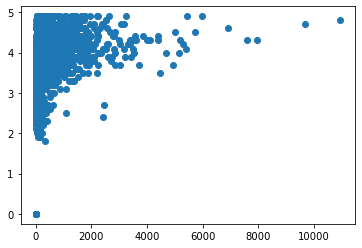

In [81]:
# Ques2 part 1 part 1
import requests as rq
import json
import pandas as pd 
import os
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv' ) 

basic_api = 'https://developers.zomato.com/api/v2.1'
h = {'user-key' : 'f1df46a72b710c0b647e149bbe7d63ca'}
p = {'city_id' : '1' }
res = rq.get(basic_api + '/search' , headers = h  , params = p)
res.json()
x = data['Aggregate rating']
y = data['Votes']
plt.scatter( y , x , linewidths=None,  edgecolors=None, plotnonfinite=False, data=None)

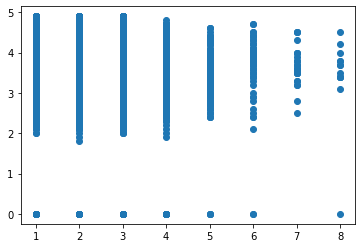

In [82]:
# Ques2 part 1 part 2
import requests as rq
import json
import pandas as pd 
import os
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv' )
data = data.dropna()
x = data['Aggregate rating']
y = []
for i in data['Cuisines']:
    a = i.split(',')
    y.append(len(a))

plt.scatter( y , x)


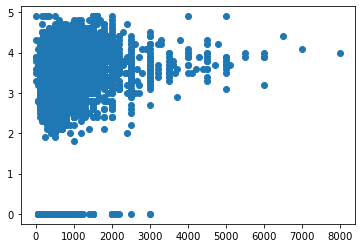

In [83]:
# Ques2 part 1 part 3
import requests as rq
import json
import pandas as pd 
import os
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv' )
data = data[data['Country Code'] == 1]
x = data['Aggregate rating']
y = data['Average Cost for two']
plt.scatter( y , x , linewidths=None,  edgecolors=None, plotnonfinite=False, data=None)

In [84]:
# Ques2 part 2 part 1
import requests as rq
import json
import pandas as pd 
import os
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv' ) 
data = data.dropna()
total_locality_votes = {}
for i in data.index: 
    if data['Locality'][i] in total_locality_votes:
        total_locality_votes[data['Locality'][i]] += data['Votes'][i]
    else:
        total_locality_votes[data['Locality'][i]] = data['Votes'][i]
total_locality_votes
weighted_rating = {}
for i in total_locality_votes:
    temp = data[data['Locality'] == i]
    weighted_rating[i] = 0
    for j in temp.index:
        weighted_rating[i] += (temp['Aggregate rating'][j] * temp['Votes'][j])
    weighted_rating[i] = weighted_rating[i] / total_locality_votes[i]
weighted_rating 
count = 0
print('Weighted restaurant rating of each locality')
print('-------------------------------------------')
while(count < 10):
    max_key = max(weighted_rating , key = weighted_rating.get)
    print(max_key , weighted_rating[max_key])
    weighted_rating.pop(max_key)
    count +=1

<ipython-input-84-ad64a5772960>:23: RuntimeWarning: invalid value encountered in double_scalars
  weighted_rating[i] = weighted_rating[i] / total_locality_votes[i]


Weighted restaurant rating of each locality
-------------------------------------------
Sofitel Philippine Plaza Manila, Pasay City 4.9
Setor De Clubes Esportivos Sul 4.9
Gíçvea 4.9
The Milk District 4.9
Windermere 4.9
Paia 4.9
Kenwood 4.9
New Tampa 4.9
Venetian Village, Al Maqtaa 4.9
Deira City Centre Area 4.9


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

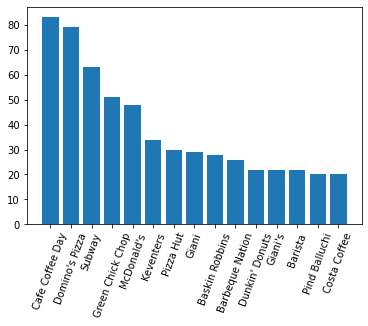

In [85]:
# Ques3 part 1
import requests as rq
import json
import pandas as pd 
import os
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv' )
typea = {}
for i in data['Restaurant Name']:
    if i in typea:
        typea[i] +=1
    else:
        typea[i] = 1
count = 0
x = []
y = []
while count < 15:
    max_key = max(typea , key = typea.get)
#     print(max_key , typea[max_key] )
    x.append(max_key)
    y.append(typea[max_key])
    typea.pop(max_key)
    count +=1
plt.bar(x , y)
plt.xticks(rotation=70)


(array([2148.,    0.,    0.,    3.,  183., 1247., 2490., 2100., 1079.,
         301.]),
 array([0.  , 0.49, 0.98, 1.47, 1.96, 2.45, 2.94, 3.43, 3.92, 4.41, 4.9 ]),
 <a list of 10 Patch objects>)

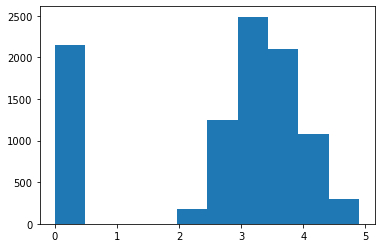

In [86]:
# Ques3 part 2
import requests as rq
import json
import pandas as pd 
import os
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv' )
d = []
for i in data['Aggregate rating']:
    d.append(i)
plt.hist(d)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

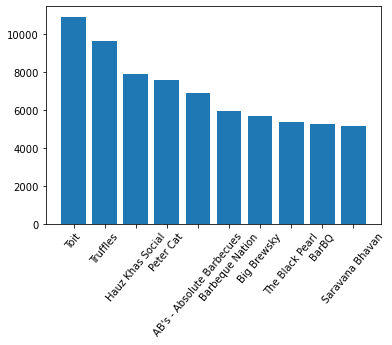

In [87]:
# Ques3 part 3
import requests as rq
import json
import pandas as pd 
import os
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv' )
ans = {}
for i in data.index:
    if data['Restaurant Name'][i] in ans:
        if data['Votes'][i] > ans[data['Restaurant Name'][i]]:
            ans[data['Restaurant Name'][i]] = data['Votes'][i]
    else:
        ans[data['Restaurant Name'][i]] = data['Votes'][i]
ans
count = 0
x = []
y = []
while count <10:
    max_key = max(ans , key = ans.get)
    x.append(max_key)
    y.append(ans[max_key])
    ans.pop(max_key)
#     print(max_key)
    count += 1
plt.bar(x,y)
plt.xticks(rotation=50)

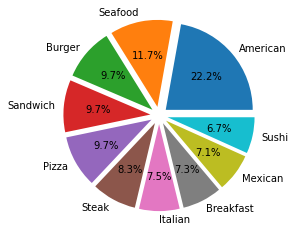

In [88]:
# Ques3 part 4
import requests as rq
import json
import pandas as pd 
import os
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv' )
data = data[data['Country Code'] == 216].dropna()
cus = {}
for i in data['Cuisines']:
    a = i.split(',')
    for j in a:
        b = j.strip()
        if b in cus:
            cus[b] +=1
        else:
            cus[b] =1
count = 0
x = []
y = []
while count <10:
    max_key = max(cus , key = cus.get)
    x.append(max_key)
    y.append(cus[max_key])
    cus.pop(max_key)
#     print(max_key)
    count += 1
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(y , labels = x , autopct='%1.1f%%' , explode = explode)
plt.show()

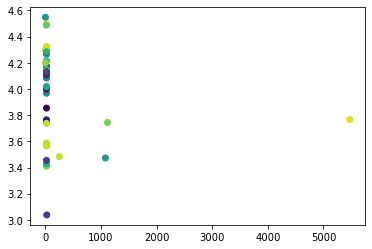

43

In [89]:
# Ques3 part 5
import requests as rq
import json
import pandas as pd 
import os
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv' )
data = data[data['Country Code'] == 1 ].dropna()

# Uncomment For more Clarity
# data = data[data['City'] != 'New Delhi'  ].dropna()
# data = data[data['City'] != 'Noida'  ].dropna() 
# data = data[data['City'] != 'Gurgaon'  ].dropna() 
# data = data[data['City'] != 'Faridabad'  ].dropna() 


total_locality_votes = {}
tot = {}
for i in data['City']:
    if i in tot:
        tot[i] += 1
    else:
        tot[i] = 1
        
for i in data.index: 
    if data['City'][i] in total_locality_votes:
        total_locality_votes[data['City'][i]] += data['Votes'][i]
    else:
        total_locality_votes[data['City'][i]] = data['Votes'][i]
total_locality_votes
weighted_rating = {}
for i in total_locality_votes:
    temp = data[data['City'] == i]
    weighted_rating[i] = 0
    for j in temp.index:
        weighted_rating[i] += (temp['Aggregate rating'][j] * temp['Votes'][j])
    weighted_rating[i] = weighted_rating[i] / total_locality_votes[i]
weighted_rating 
count = 0
x = []
y = []
for i in weighted_rating:
    x.append(weighted_rating[i])
for i in tot:
    y.append(tot[i])
colors = np.random.rand(len(x))     
plt.scatter(y,x , c = colors)
plt.show()
len(x)